In [ ]:
import numpy as np
import numpy.random as npr
import math
from scipy import special
import torch
from tqdm import tqdm_notebook as tqdm

from scipy import linalg
from matplotlib import pyplot as plt


In [ ]:
def target_fun(x):
    return np.sin(x*10)

def gen_data(n,d, domain):
    X = np.random.uniform(domain[0], domain[1], size = n)
    t = target_fun(X) + np.random.normal(size=X.shape)*0.1
    return X, t

def poly_expand(X, d=20, poly_type = 'legendre'):
  if poly_type == 'legendre':
    return np.polynomial.legendre.legvander(X, d)
  else:
    return np.polynomial.chebyshev.chebvander(X, d)

def plot_prediction(X, W, d, domain, plot=True):
  X_expand = poly_expand(X, d=d, poly_type = poly_type)
  p_train = X_expand.dot(W)
  loss = (((t - p_train)**2)*0.5).mean()

  X_val_raw = np.linspace(domain[0], domain[1], 1000)
  X_val_expand = poly_expand(X_val_raw, d=d, poly_type = poly_type)
  p_val = X_val_expand.dot(W)
  t_val = target_fun(X_val_raw)
  loss_val = (((t_val - p_val)**2)*0.5).mean()
  
  if plot:
    plt.plot(X_val_raw, p_val, label='deg {}'.format(d))
    plt.plot(X, t, 'o')
    plt.plot(X, p_train, '*')
    plt.ylim(-2, 2)
    plt.xlim(domain[0], domain[1])
  return loss_val

def plot_target_func():
  x = np.linspace(0, 1, 1000)
  plt.plot(x, target_fun(x), '--', label="target func")

def plot_val_loss(poly_degrees, losses):
  plt.figure()
  plt.plot(poly_degrees, losses)
  plt.semilogy()
  plt.semilogx()
  plt.ylim(0., 100)
  plt.ylabel('test loss')
  plt.xlabel('poly degrees')


In [ ]:
# to be implemented; fill in the derived solution for the underparameterized (d<n) and overparameterized (d>n) problem

def fit_poly(X, d,t):
  X_expand = poly_expand(X, d=d, poly_type = poly_type)
  n = X.shape[0]
  if d > n:
    ## W = ... (Your solution for Part 3.3.2)
  else:
    ## W = ... (Your solution for Part 3.2)
  return W

(0.0, 1.0)

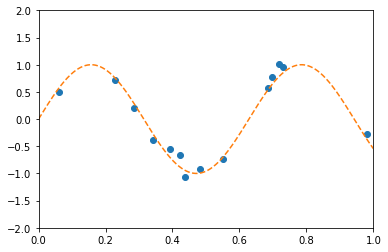

In [ ]:
domain = [0., 1.]
n = 14
np.random.seed(123)
X, t = gen_data(n, 1, domain)

plt.plot(X, t, 'o')
plot_target_func()
plt.ylim(-2, 2)
plt.xlim(domain[0], domain[1])

In [ ]:
poly_type = 'chebyshev' # try legendre or chebyshev
loss_val_list = []

poly_degrees = [2, 3, 4, 5, 7, 10, 15, 20,30,50,70,100,150,200] 
plot_poly_degress = [4, 7, 10, 70, 150] ## only plot these polynomials
##  
plot_target_func()

for d in poly_degrees:
  W = fit_poly(X, d,t)
  plot_flag = True if d in plot_poly_degress else False
  loss_val = plot_prediction(X, W, d, domain, plot_flag)
  loss_val_list.append(loss_val)
plt.legend()

plot_val_loss(poly_degrees, loss_val_list)